<a href="https://colab.research.google.com/github/relladonna/-2.0/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Мосина Вероника Григорьевна ПИИ

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


# функция для отправки запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# отчистка данных
def clear_data(data):
    # определение даты
    current_date = datetime.today().date()
    day = current_date.day
    month = current_date.month
    current_date = f'{day}.{month}'

    # определение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # определение погодных условии
    weather_code = data['current']['weather_code']
    bad_weather = [51, 53, 55, 61, 63, 65, 71, 73, 75, 80, 81, 82 ]
    if weather_code in [0, 1]:
        message = 'нет осадков, ясно'
    elif weather_code == 45:
        message = 'нет осадков, туман'
    elif weather_code in bad_weather:
        message = 'осадки, без тумана'
    else:
        message = 'посмотри в окно'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {message}'

    return message


def main():
    coordinates = input('Введите ваши координаты:\n').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши координаты:
56.50, 60.35
Сегодня (1.11) погода 1.4 °C, посмотри в окно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


# отправка запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# список имен
def list_names(pokemons):
  s = list()
  for i in pokemons['results']:
    s.append(i['name'])
  return s


# Информация о запрашиваемом покемоне
def information_pokemon():
  print('Введите имя покемона')
  pokemon = input()
  p = f'https://pokeapi.co/api/v2/pokemon/{pokemon}/'
  info = send_request(p)
  print('Его рост', info['height'])
  print('Его вес', info['weight'])
  print('Его способности:')
  for i in info['abilities']:
    print(i['ability']['name'])
  print('Его тип:')
  for i in info['types']:
    print(i['type']['name'])
  return

pokemons = send_request('https://pokeapi.co/api/v2/pokemon/')
print(list_names(pokemons))
information_pokemon()

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
clefairy
Его рост 6
Его вес 75
Его способности:
cute-charm
magic-guard
friend-guard
Его тип:
fairy


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


# отправка запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# выводит словарь по id
def id():
  print('Введите id поста')
  id = int(input())
  url = f'https://jsonplaceholder.typicode.com/posts/{id}'
  return send_request(url)


# важная информация
def info():
  dictionary = id()
  print('Заголовок:', dictionary["title"])
  print('Пост:', dictionary["body"])
  return


send_request('https://jsonplaceholder.typicode.com/posts')
id()
info()

2
Заголовок: qui est esse
Пост: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


# отправка запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def post():
  title = input()
  body = input()
  userId = input()
  url = 'https://jsonplaceholder.typicode.com/posts'
  id = len(send_request(url)) + 1
  response = requests.post(url, data={"userId": userId,
                "id": id,
                "title": title,
                "body": body})
  print(response.text)


def put():
  id = int(input())
  userId = (id+9)//10
  title = input()
  body = input()
  updated_post = {"userId": userId,
                "id": id,
                "title": title,
                "body": body}
  response = requests.put(f'https://jsonplaceholder.typicode.com/posts/{id}', json=updated_post)
  print(response.text)


def delete():
  id = int(input())
  response = requests.delete(f'https://jsonplaceholder.typicode.com/posts/{id}')
  print(response.status_code)

send_request('https://jsonplaceholder.typicode.com/posts')
post()
put()
delete()

50
200


In [ ]:
response = requests.get('https://jsonplaceholder.typicode.com/posts')
print(len(response.json()))


100


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



1 affenpinscher
2 african
3 airedale
4 akita
5 appenzeller
6 australian
7 bakharwal
8 basenji
9 beagle
10 bluetick
11 borzoi
12 bouvier
13 boxer
14 brabancon
15 briard
16 buhund
17 bulldog
18 bullterrier
19 cattledog
20 cavapoo
21 chihuahua
22 chippiparai
23 chow
24 clumber
25 cockapoo
26 collie
27 coonhound
28 corgi
29 cotondetulear
30 dachshund
31 dalmatian
32 dane
33 danish
34 deerhound
35 dhole
36 dingo
37 doberman
38 elkhound
39 entlebucher
40 eskimo
41 finnish
42 frise
43 gaddi
44 germanshepherd
45 greyhound
46 groenendael
47 havanese
48 hound
49 husky
50 keeshond
51 kelpie
52 kombai
53 komondor
54 kuvasz
55 labradoodle
56 labrador
57 leonberg
58 lhasa
59 malamute
60 malinois
61 maltese
62 mastiff
63 mexicanhairless
64 mix
65 mountain
66 mudhol
67 newfoundland
68 otterhound
69 ovcharka
70 papillon
71 pariah
72 pekinese
73 pembroke
74 pinscher
75 pitbull
76 pointer
77 pomeranian
78 poodle
79 pug
80 puggle
81 pyrenees
82 rajapalayam
83 redbone
84 retriever
85 ridgeback
86 rottweile

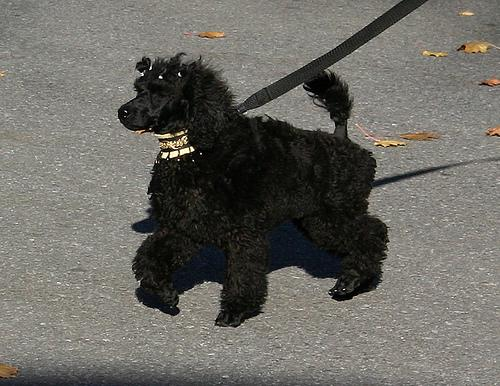

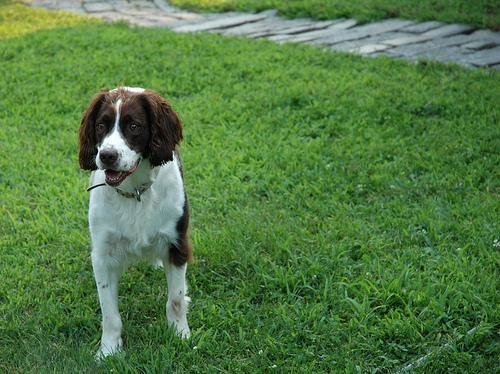

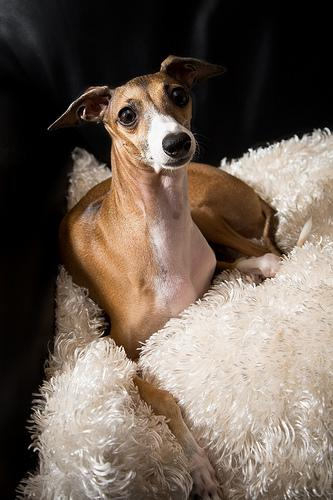

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def list_breeds():
  url = 'https://dog.ceo/api/breeds/list/all'
  response = requests.get(url)
  breeds = response.json()['message']
  c = 1
  for k in breeds.keys():
    print(c, k)
    c += 1


def picture_dog():
  name = input('Какие породы вас интересуют?\n').split(', ')
  for breed in name:
    url = f'https://dog.ceo/api/breed/{breed}/images/random'

    response = requests.get(url)

    if response.status_code == 200:
        image_url = response.json()['message']

    res = requests.get(image_url)
    img = Image.open(io.BytesIO(res.content))
    display(img)


list_breeds()
picture_dog()